In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import cv2
import os

from keras import backend as K
K.set_image_dim_ordering('th')

%matplotlib inline


Using TensorFlow backend.


In [27]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')

    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

    x_train = x_train / 255
    x_test = x_test / 255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [28]:
x_train, y_train, x_test, y_test = load_data()
num_classes = y_test.shape[1]

# O model será exportado para este arquivo
filename='mnistneuralnet.h5'

In [32]:
def model():
    model = Sequential()

    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(5, (2, 2), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax', name='predict'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [33]:
model = model()
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 5, 5)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 4, 4)           305       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 2, 2)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 2, 2)           0         
__________

In [34]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200)
model.save_weights(filename)

model.load_weights('./{}'.format(filename) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.8566 - acc: 0.7143 - val_loss: 0.1987 - val_acc: 0.9426
Epoch 2/20
60000/60000 [==============================] - 21s 347us/step - loss: 0.3600 - acc: 0.8845 - val_loss: 0.1622 - val_acc: 0.9527
Epoch 3/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.2853 - acc: 0.9100 - val_loss: 0.1190 - val_acc: 0.9635
Epoch 4/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.2513 - acc: 0.9193 - val_loss: 0.1078 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.2290 - acc: 0.9268 - val_loss: 0.0903 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.2109 - acc: 0.9328 - val_loss: 0.1006 - val_acc: 0.9699
Epoch 7/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.1984 - acc: 0.9359 - val_loss: 0.

In [48]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 97.82%


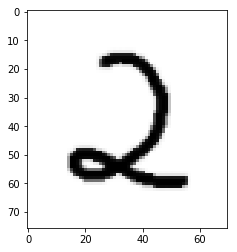

In [49]:
img_pred = cv2.imread("number-two.png", 0)
plt.imshow(img_pred, cmap='gray')

In [52]:
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0


error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3361: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [53]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " com confiança de ", pred_proba)

0  com confiança de  98.78%
